In [14]:
d_name = "USpowerGrid"
n_trials = 500

EDGE_WEIGHT = 30

In [15]:
pref = {
    "angular_resolution": 1,
    "aspect_ratio": 1,
    "crossing_angle": 1,
    "crossing_number": 1,
    "gabriel_graph_property": 1,
    "ideal_edge_length": 1,
    "node_resolution": 1,
    "neighborhood_preservation": 1,
    "stress": 1,
    "time_complexity": 1,
}

In [16]:
# Standard Library
import argparse
from time import perf_counter

# Third Party Library
import matplotlib.pyplot as plt
import networkx as nx
import optuna
import pandas as pd
from egraph import Drawing, all_sources_bfs
from ex_utils.config.dataset import dataset_names
from ex_utils.config.paths import get_dataset_path
from ex_utils.config.quality_metrics import qm_names
from ex_utils.share import draw, ex_path, generate_base_df_data, rate2pivots
from ex_utils.utils.graph import (
    egraph_graph,
    load_nx_graph,
    nx_graph_preprocessing,
)
from tqdm import tqdm

In [17]:
db_uri = f"sqlite:///{ex_path.joinpath('data/optimization/optimization.db')}"
study_name = f"{d_name}_n-trials={n_trials}_multi-objective"
study = optuna.load_study(study_name=study_name, storage=db_uri)

In [18]:
best_trials = []
sorted_quality_metrics = dict((qm_name, []) for qm_name in qm_names)

for trial in study.best_trials:
    trial_dict = {
        **trial.user_attrs["quality_metrics"],
        **trial.params,
    }
    best_trials.append(trial_dict)

    for qm_name in qm_names:
        sorted_quality_metrics[qm_name].append(trial_dict[qm_name])

for qm_name in qm_names:
    sorted_quality_metrics[qm_name] = sorted(sorted_quality_metrics[qm_name])

for trial in best_trials:
    for qm_name in qm_names:
        trial[f"{qm_name}_asc_order"] = sorted_quality_metrics[qm_name].index(
            trial[qm_name]
        )
    trial["order_sum"] = 0
    trial["pref_order_sum"] = 0
    for qm_name in qm_names:
        trial["order_sum"] += trial[f"{qm_name}_asc_order"]
        trial["pref_order_sum"] += (
            trial[f"{qm_name}_asc_order"] * pref[qm_name]
        )

best_trials = sorted(
    best_trials, key=lambda x: x["pref_order_sum"], reverse=True
)

{'angular_resolution': -5821.79296875, 'aspect_ratio': 0.8584787845611572, 'crossing_number': -20723.0, 'gabriel_graph_property': -3759115.0, 'ideal_edge_length': -1901.221923828125, 'neighborhood_preservation': 0.05495560169219971, 'node_resolution': -8583923712.0, 'stress': -681227.9375, 'time_complexity': -934511817.832897, 'crossing_angle': -0.5404878297966028, 'pivots_rate': 0.9423643359117342, 'iterations': 27, 'eps': 0.25253215106109334, 'angular_resolution_asc_order': 416, 'aspect_ratio_asc_order': 141, 'crossing_angle_asc_order': 255, 'crossing_number_asc_order': 408, 'gabriel_graph_property_asc_order': 438, 'ideal_edge_length_asc_order': 431, 'neighborhood_preservation_asc_order': 362, 'node_resolution_asc_order': 312, 'stress_asc_order': 433, 'time_complexity_asc_order': 153, 'order_sum': 3349, 'pref_order_sum': 3349}


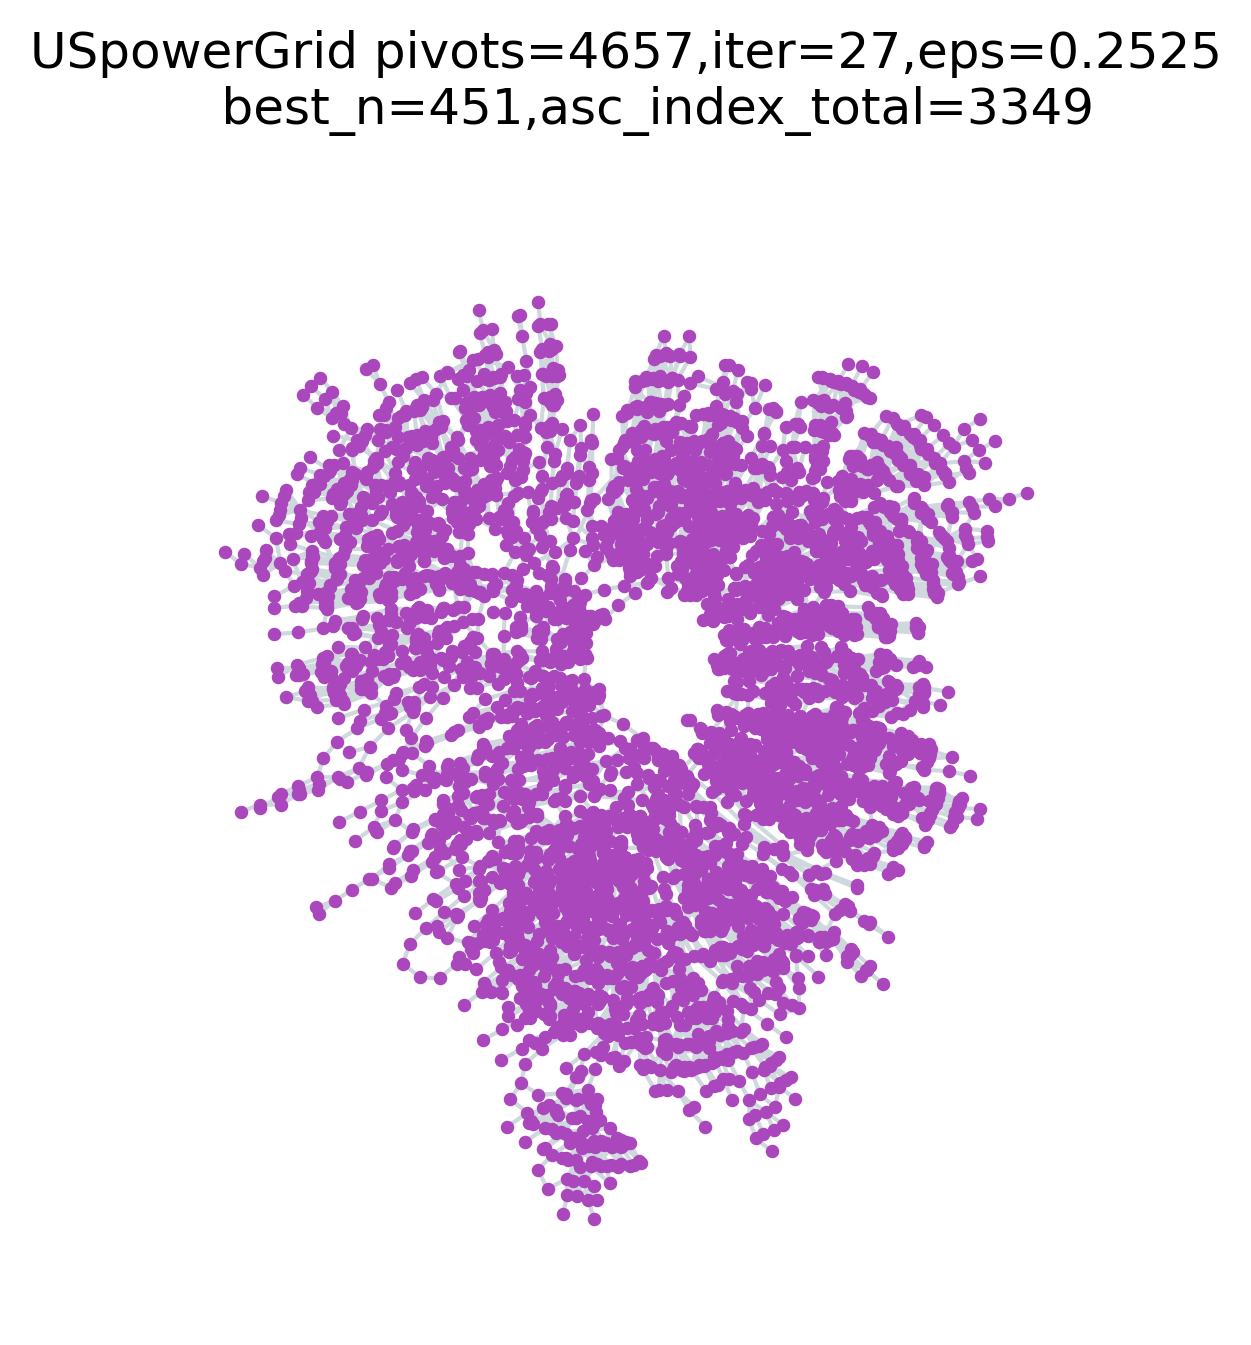

{'angular_resolution': -5825.6328125, 'aspect_ratio': 0.8596096634864807, 'crossing_number': -20771.0, 'gabriel_graph_property': -3810227.5, 'ideal_edge_length': -1920.5374755859375, 'neighborhood_preservation': 0.05423877760767937, 'node_resolution': -8617038848.0, 'stress': -681325.6875, 'time_complexity': -1188756850.8765109, 'crossing_angle': -0.5390533789598478, 'pivots_rate': 0.8913213598219909, 'iterations': 41, 'eps': 0.28375579135482026, 'angular_resolution_asc_order': 415, 'aspect_ratio_asc_order': 238, 'crossing_angle_asc_order': 271, 'crossing_number_asc_order': 397, 'gabriel_graph_property_asc_order': 418, 'ideal_edge_length_asc_order': 419, 'neighborhood_preservation_asc_order': 330, 'node_resolution_asc_order': 265, 'stress_asc_order': 424, 'time_complexity_asc_order': 132, 'order_sum': 3309, 'pref_order_sum': 3309}


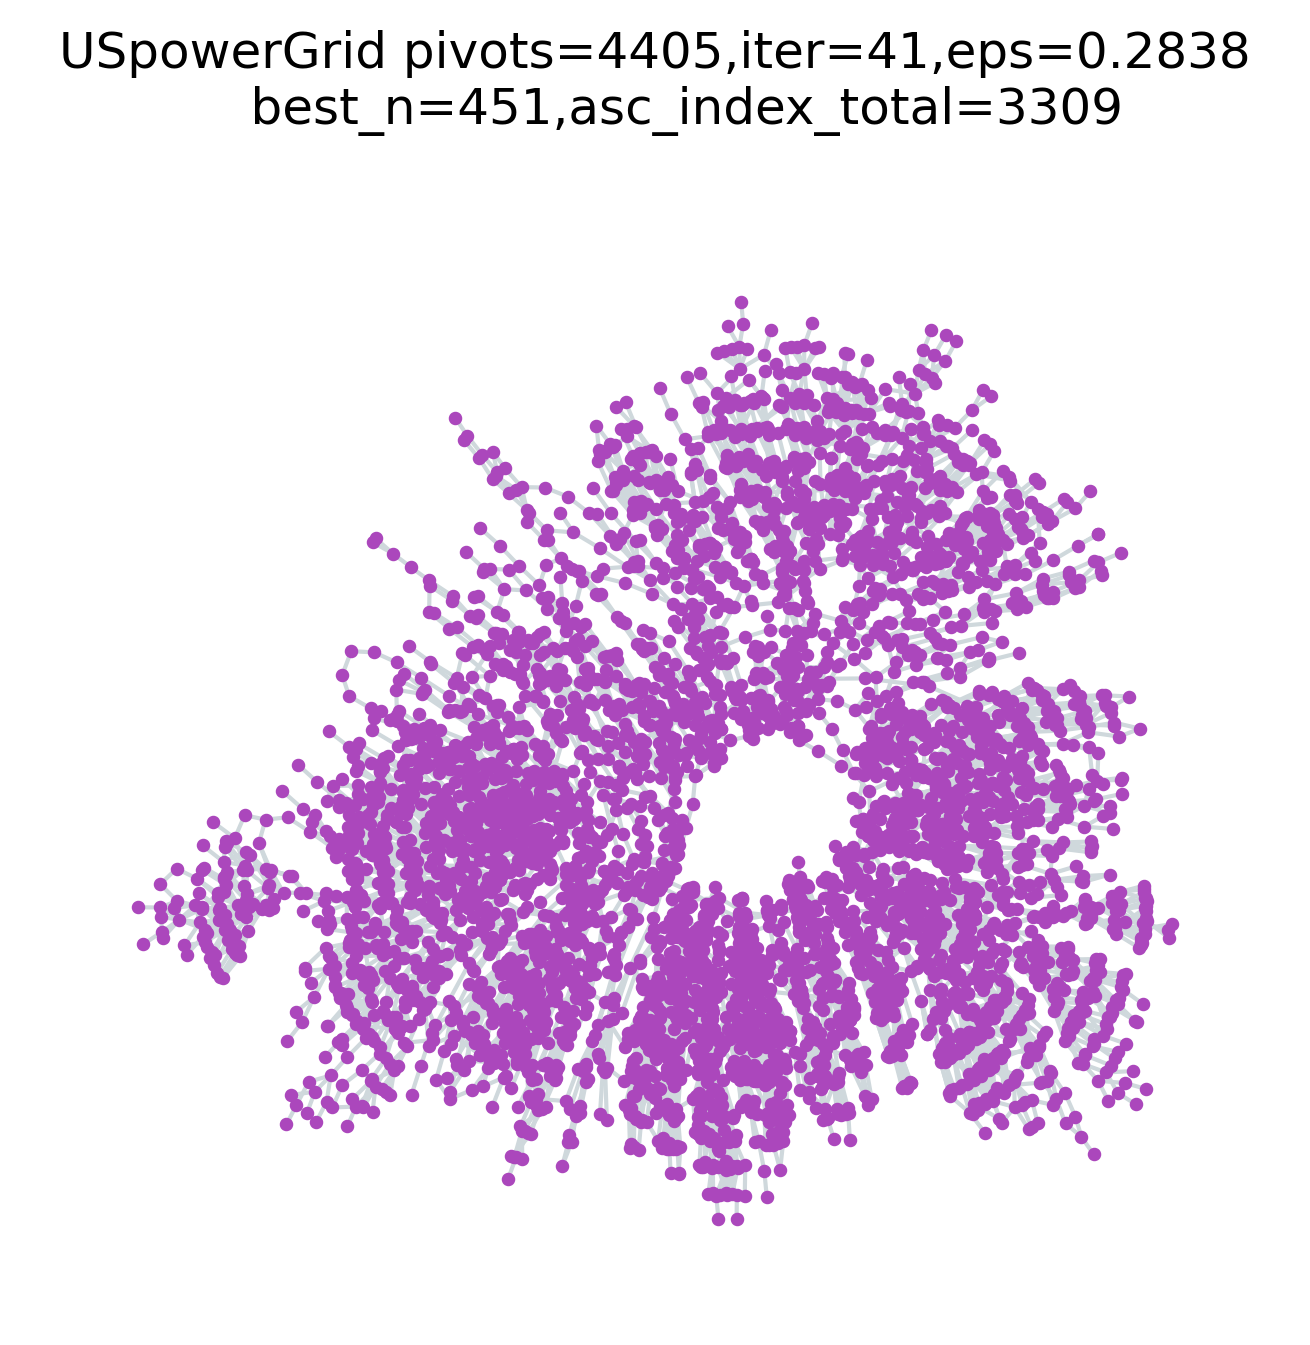

{'angular_resolution': -5758.6669921875, 'aspect_ratio': 0.8592472076416016, 'crossing_number': -20667.0, 'gabriel_graph_property': -3698082.5, 'ideal_edge_length': -1863.4425048828125, 'neighborhood_preservation': 0.05213610455393791, 'node_resolution': -8620857344.0, 'stress': -681078.375, 'time_complexity': -1972538014.8765109, 'crossing_angle': -0.5345237312200609, 'pivots_rate': 0.8913213598219909, 'iterations': 77, 'eps': 0.0469174224689174, 'angular_resolution_asc_order': 440, 'aspect_ratio_asc_order': 195, 'crossing_angle_asc_order': 317, 'crossing_number_asc_order': 425, 'gabriel_graph_property_asc_order': 449, 'ideal_edge_length_asc_order': 446, 'neighborhood_preservation_asc_order': 214, 'node_resolution_asc_order': 256, 'stress_asc_order': 441, 'time_complexity_asc_order': 81, 'order_sum': 3264, 'pref_order_sum': 3264}


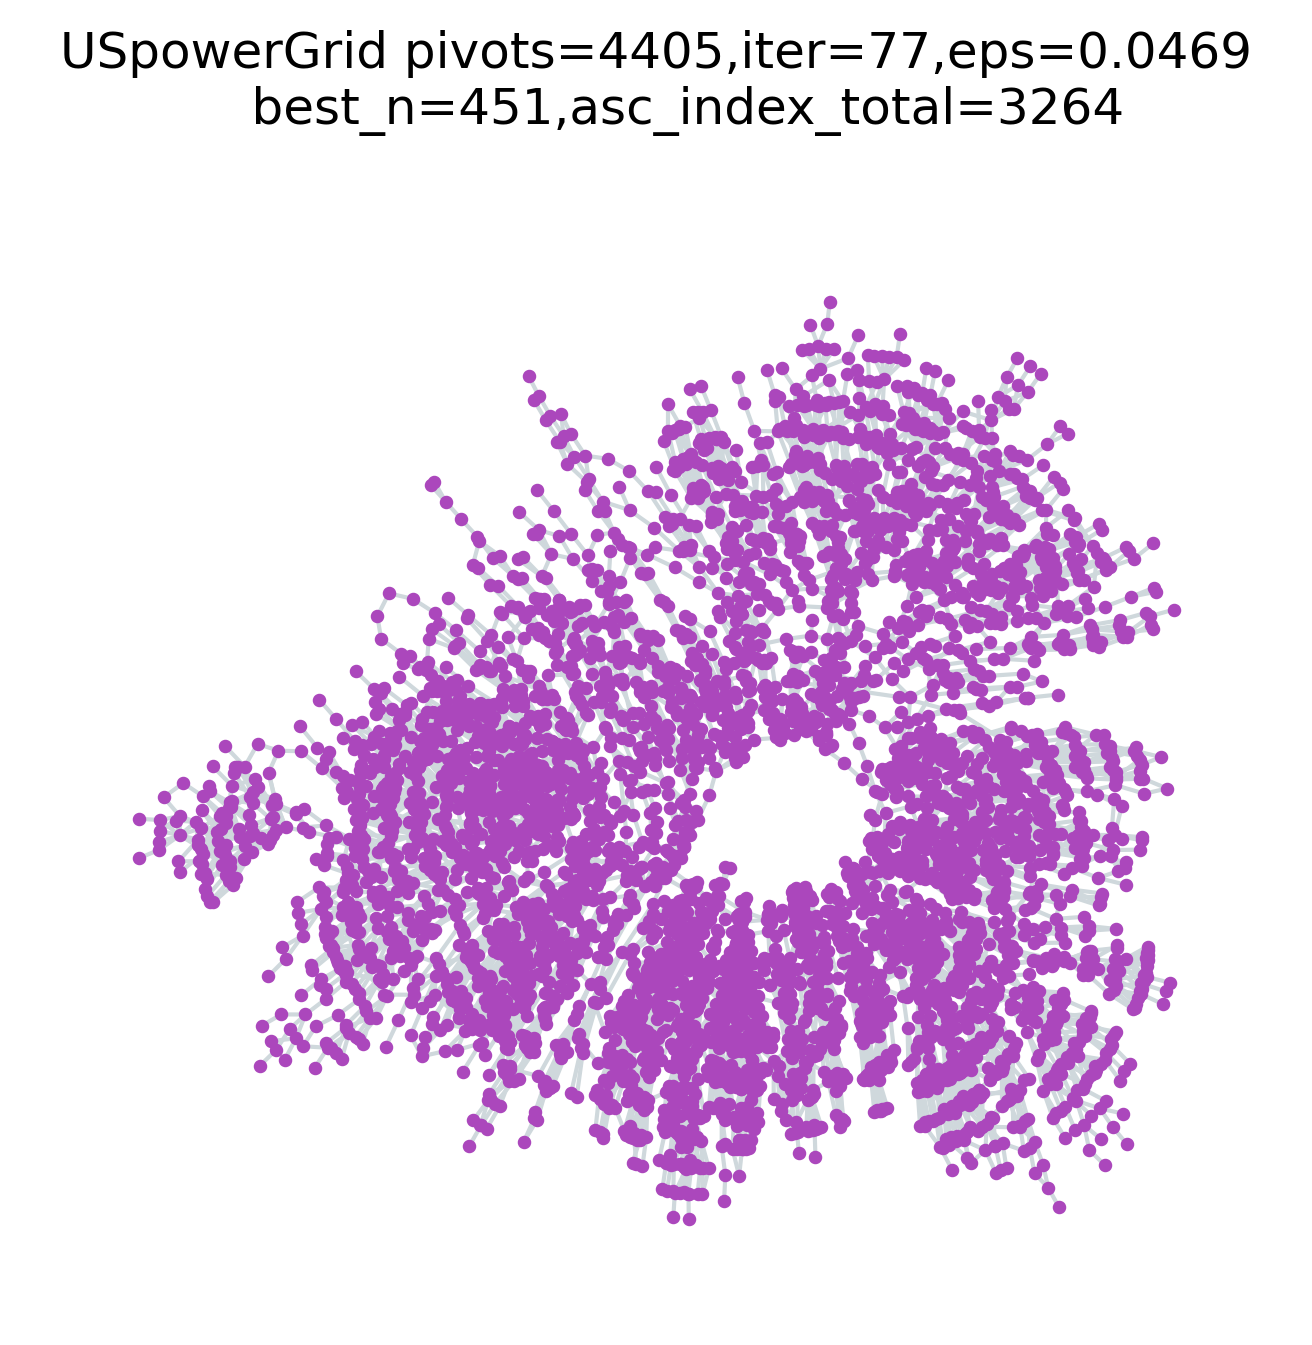

{'angular_resolution': -5758.6669921875, 'aspect_ratio': 0.8592472076416016, 'crossing_number': -20667.0, 'gabriel_graph_property': -3698082.5, 'ideal_edge_length': -1863.4425048828125, 'neighborhood_preservation': 0.05213610455393791, 'node_resolution': -8620857344.0, 'stress': -681078.375, 'time_complexity': -1972538014.8765109, 'crossing_angle': -0.5345237312200609, 'pivots_rate': 0.8913213598219909, 'iterations': 77, 'eps': 0.0469174224689174, 'angular_resolution_asc_order': 440, 'aspect_ratio_asc_order': 195, 'crossing_angle_asc_order': 317, 'crossing_number_asc_order': 425, 'gabriel_graph_property_asc_order': 449, 'ideal_edge_length_asc_order': 446, 'neighborhood_preservation_asc_order': 214, 'node_resolution_asc_order': 256, 'stress_asc_order': 441, 'time_complexity_asc_order': 81, 'order_sum': 3264, 'pref_order_sum': 3264}


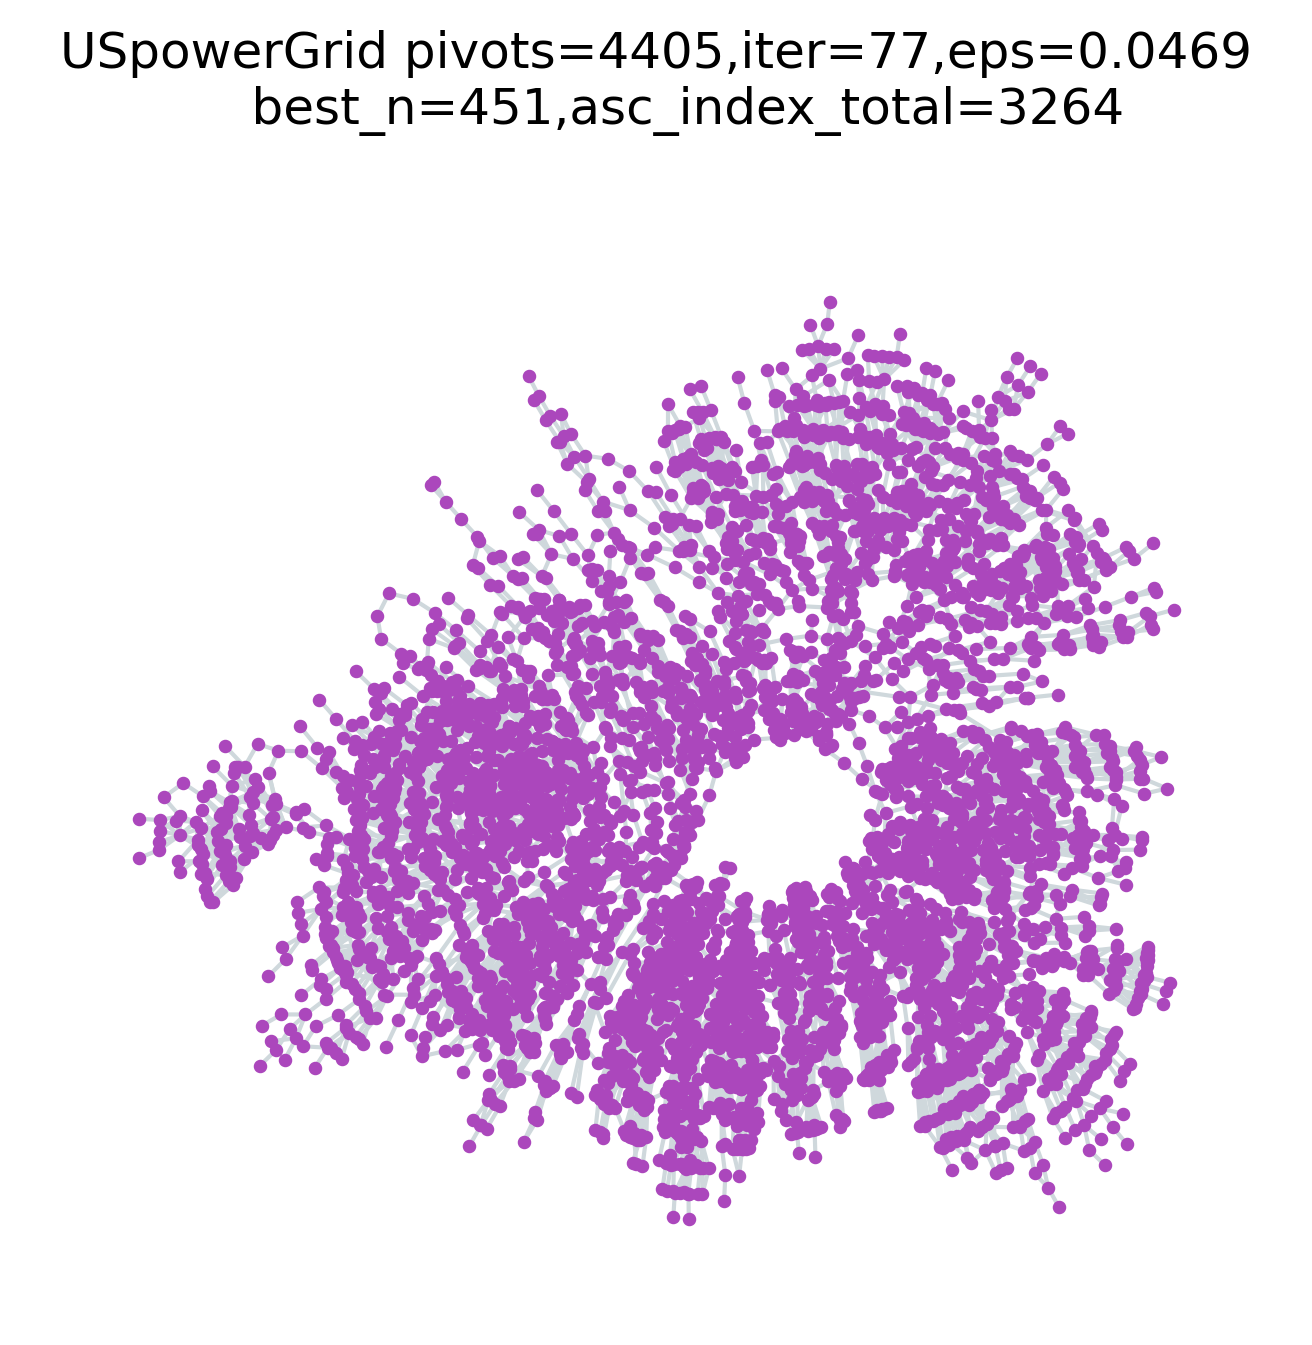

{'angular_resolution': -5783.0751953125, 'aspect_ratio': 0.8593581318855286, 'crossing_number': -20597.0, 'gabriel_graph_property': -3772984.75, 'ideal_edge_length': -1909.3519287109375, 'neighborhood_preservation': 0.05255596712231636, 'node_resolution': -8597085184.0, 'stress': -681269.4375, 'time_complexity': -2299113499.8765106, 'crossing_angle': -0.5405634012234791, 'pivots_rate': 0.8913213598219909, 'iterations': 92, 'eps': 0.28375579135482026, 'angular_resolution_asc_order': 429, 'aspect_ratio_asc_order': 208, 'crossing_angle_asc_order': 254, 'crossing_number_asc_order': 434, 'gabriel_graph_property_asc_order': 433, 'ideal_edge_length_asc_order': 426, 'neighborhood_preservation_asc_order': 235, 'node_resolution_asc_order': 299, 'stress_asc_order': 431, 'time_complexity_asc_order': 56, 'order_sum': 3205, 'pref_order_sum': 3205}


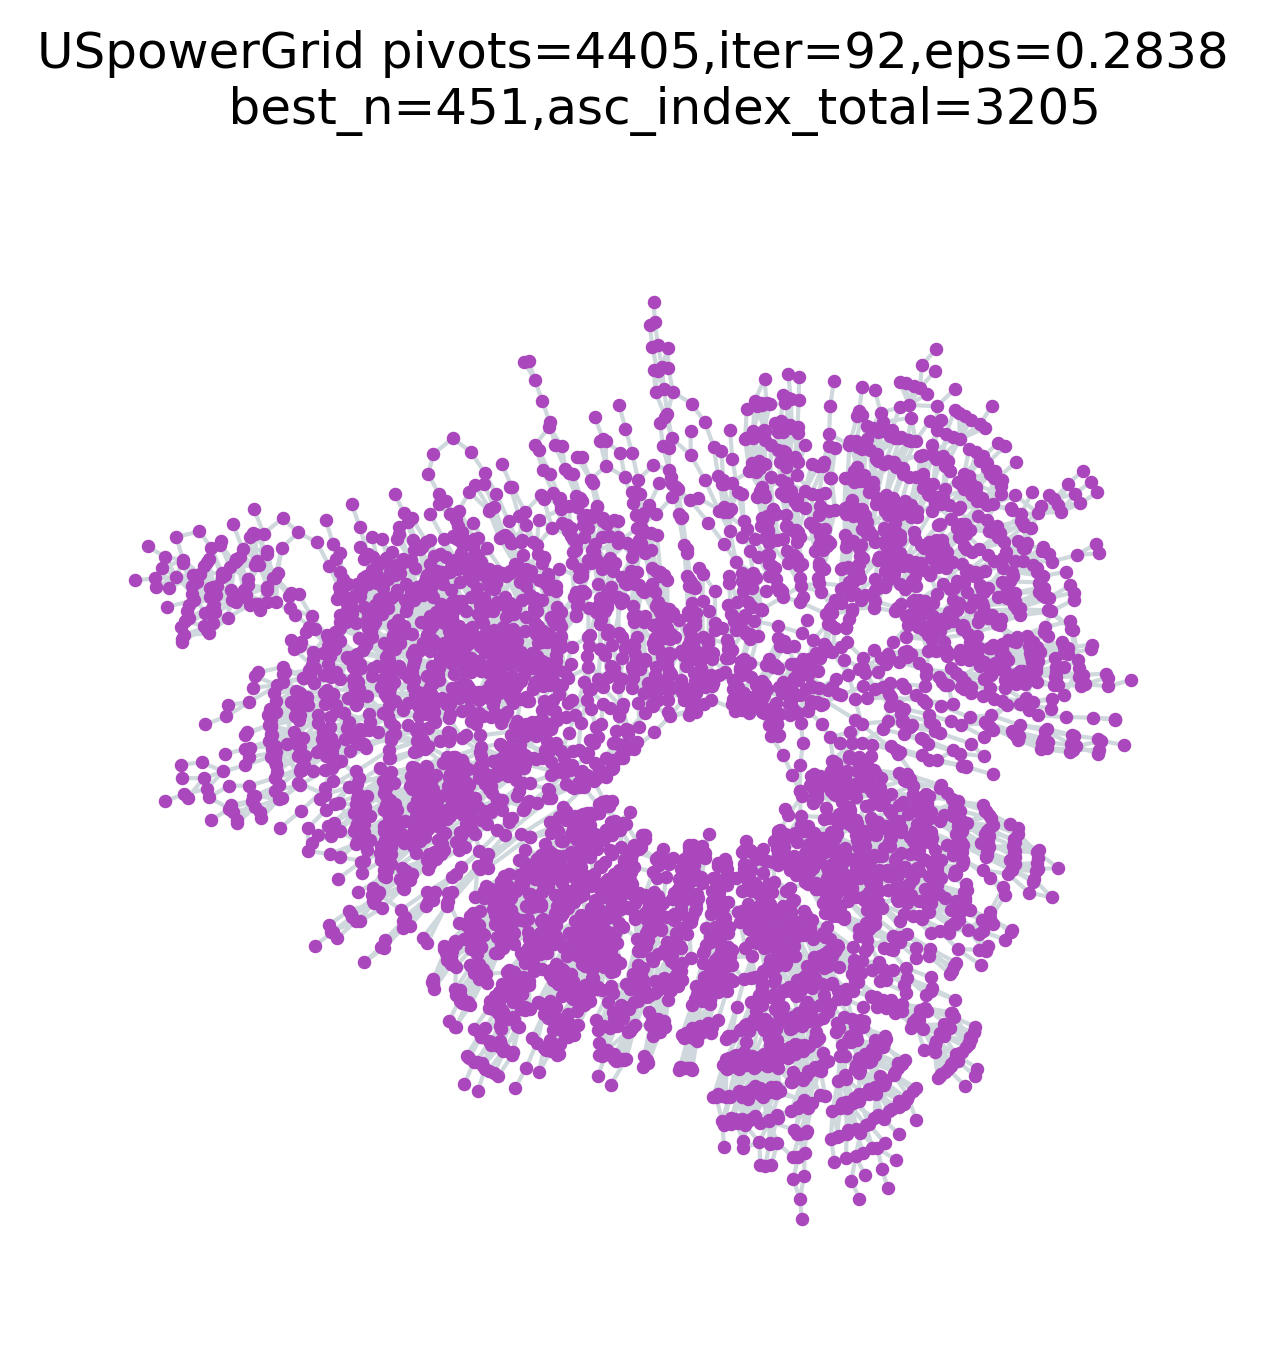

{'angular_resolution': -5748.80615234375, 'aspect_ratio': 0.8593828082084656, 'crossing_number': -20713.0, 'gabriel_graph_property': -3757932.0, 'ideal_edge_length': -1876.55615234375, 'neighborhood_preservation': 0.051842398941516876, 'node_resolution': -8610904064.0, 'stress': -681039.8125, 'time_complexity': -3235296556.8765106, 'crossing_angle': -0.5364386571838942, 'pivots_rate': 0.8913213598219909, 'iterations': 135, 'eps': 0.0469174224689174, 'angular_resolution_asc_order': 446, 'aspect_ratio_asc_order': 212, 'crossing_angle_asc_order': 303, 'crossing_number_asc_order': 410, 'gabriel_graph_property_asc_order': 439, 'ideal_edge_length_asc_order': 440, 'neighborhood_preservation_asc_order': 202, 'node_resolution_asc_order': 279, 'stress_asc_order': 447, 'time_complexity_asc_order': 24, 'order_sum': 3202, 'pref_order_sum': 3202}


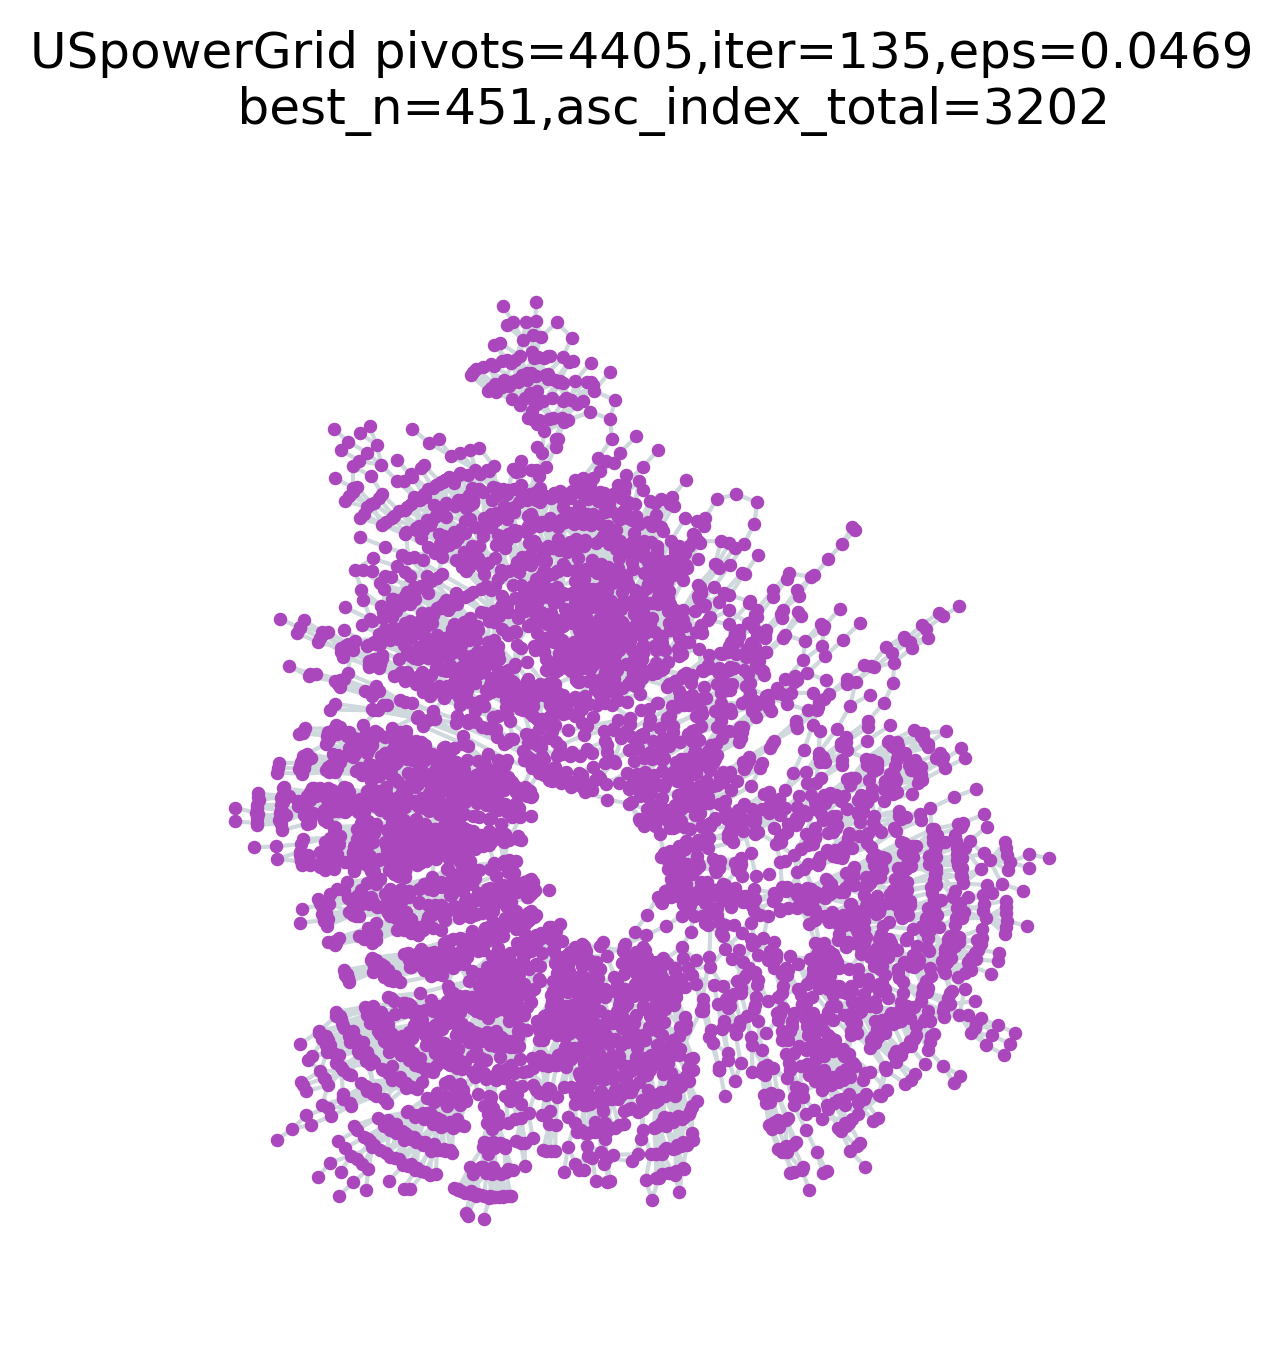

{'angular_resolution': -5745.1318359375, 'aspect_ratio': 0.8592750430107117, 'crossing_number': -20703.0, 'gabriel_graph_property': -3746218.5, 'ideal_edge_length': -1873.9830322265625, 'neighborhood_preservation': 0.05272400751709938, 'node_resolution': -8613978112.0, 'stress': -681023.3125, 'time_complexity': -4056737000.3609343, 'crossing_angle': -0.5384321188354345, 'pivots_rate': 0.909655252115891, 'iterations': 169, 'eps': 0.0469174224689174, 'angular_resolution_asc_order': 448, 'aspect_ratio_asc_order': 201, 'crossing_angle_asc_order': 278, 'crossing_number_asc_order': 412, 'gabriel_graph_property_asc_order': 442, 'ideal_edge_length_asc_order': 443, 'neighborhood_preservation_asc_order': 244, 'node_resolution_asc_order': 273, 'stress_asc_order': 448, 'time_complexity_asc_order': 12, 'order_sum': 3201, 'pref_order_sum': 3201}


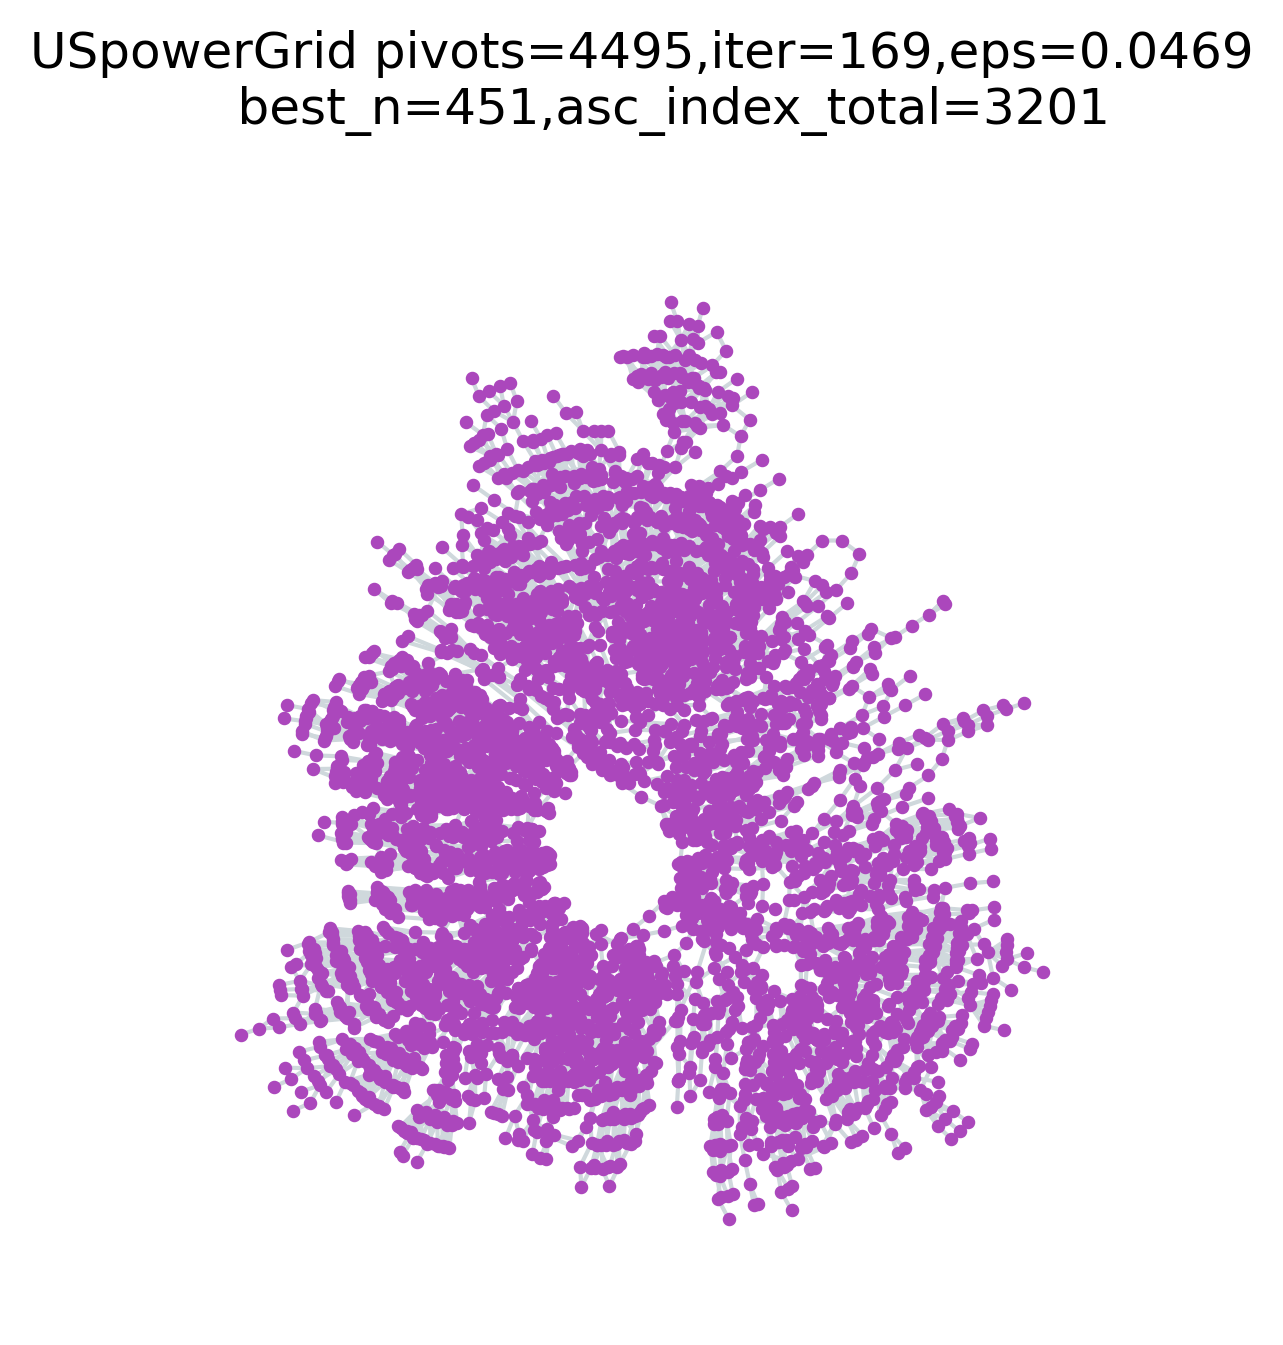

{'angular_resolution': -5889.09521484375, 'aspect_ratio': 0.8597314357757568, 'crossing_number': -21006.0, 'gabriel_graph_property': -3987655.25, 'ideal_edge_length': -1999.137939453125, 'neighborhood_preservation': 0.05529326945543289, 'node_resolution': -8615260160.0, 'stress': -681623.375, 'time_complexity': -633151686.808148, 'crossing_angle': -0.5414943758628488, 'pivots_rate': 0.9063577500071538, 'iterations': 15, 'eps': 0.30123856078046674, 'angular_resolution_asc_order': 378, 'aspect_ratio_asc_order': 248, 'crossing_angle_asc_order': 242, 'crossing_number_asc_order': 335, 'gabriel_graph_property_asc_order': 370, 'ideal_edge_length_asc_order': 387, 'neighborhood_preservation_asc_order': 373, 'node_resolution_asc_order': 271, 'stress_asc_order': 404, 'time_complexity_asc_order': 189, 'order_sum': 3197, 'pref_order_sum': 3197}


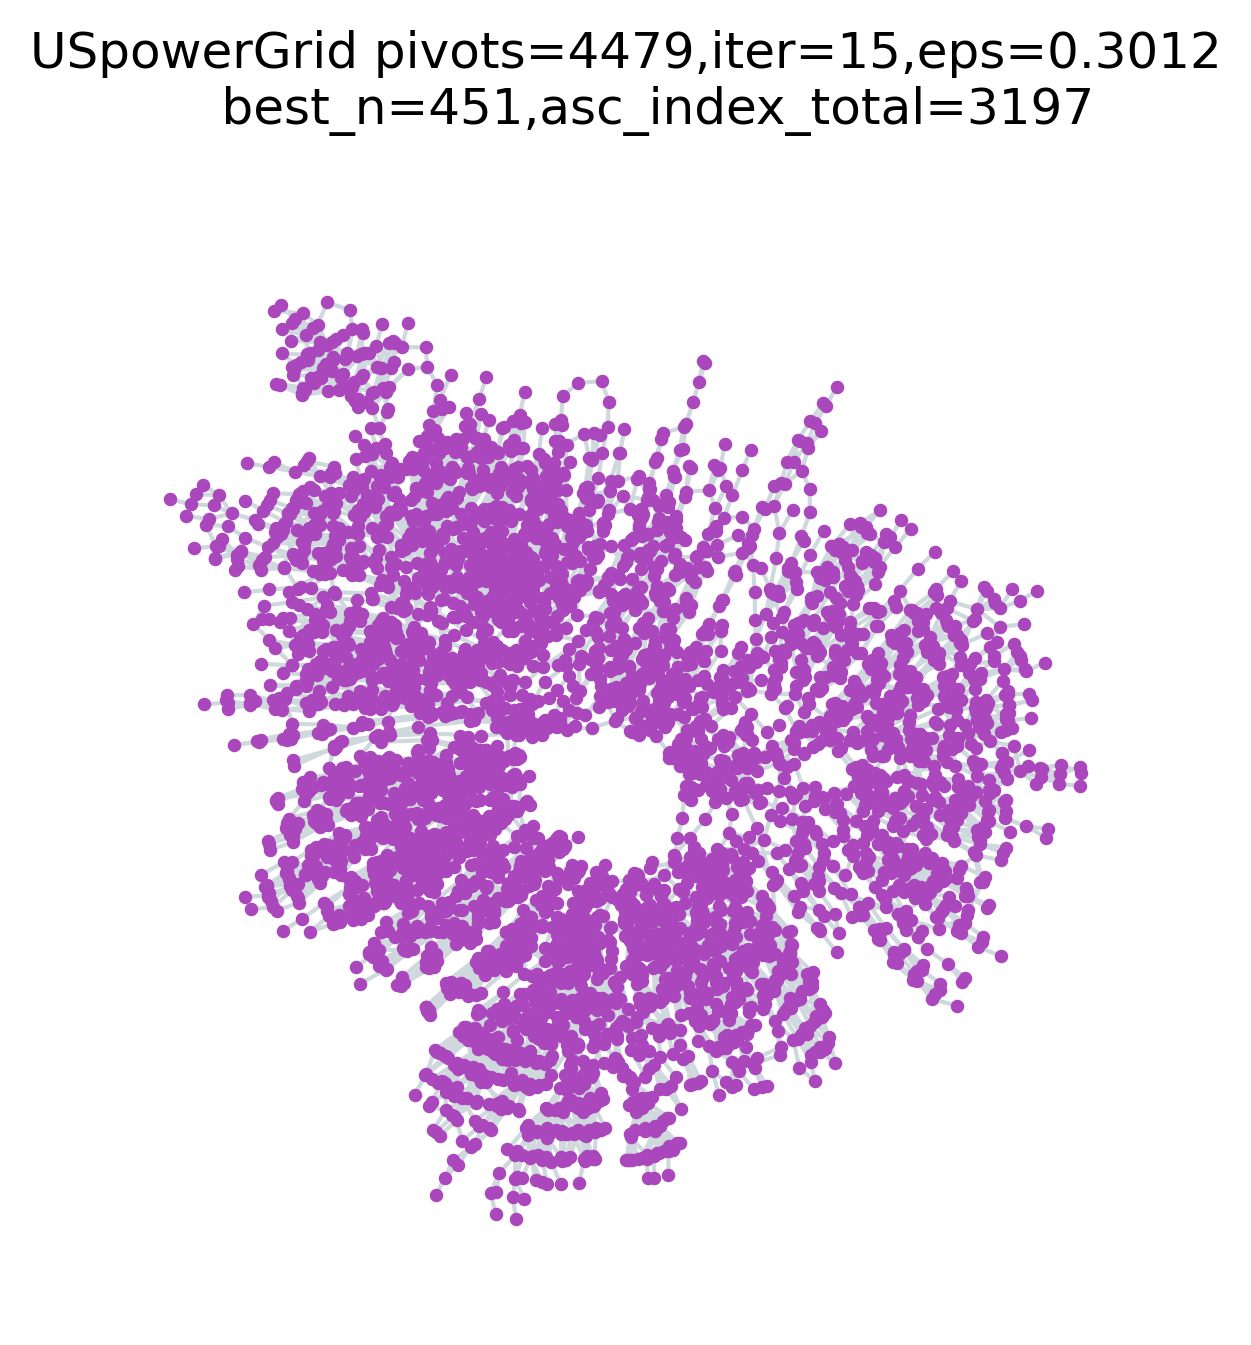

{'angular_resolution': -5847.13916015625, 'aspect_ratio': 0.8592278957366943, 'crossing_number': -20759.0, 'gabriel_graph_property': -3799977.0, 'ideal_edge_length': -1942.7745361328125, 'neighborhood_preservation': 0.054871220141649246, 'node_resolution': -8643411968.0, 'stress': -681546.375, 'time_complexity': -749889388.2183249, 'crossing_angle': -0.5417047556933138, 'pivots_rate': 0.8165338218395926, 'iterations': 24, 'eps': 0.37319617534027355, 'angular_resolution_asc_order': 405, 'aspect_ratio_asc_order': 190, 'crossing_angle_asc_order': 240, 'crossing_number_asc_order': 399, 'gabriel_graph_property_asc_order': 422, 'ideal_edge_length_asc_order': 410, 'neighborhood_preservation_asc_order': 356, 'node_resolution_asc_order': 187, 'stress_asc_order': 409, 'time_complexity_asc_order': 178, 'order_sum': 3196, 'pref_order_sum': 3196}


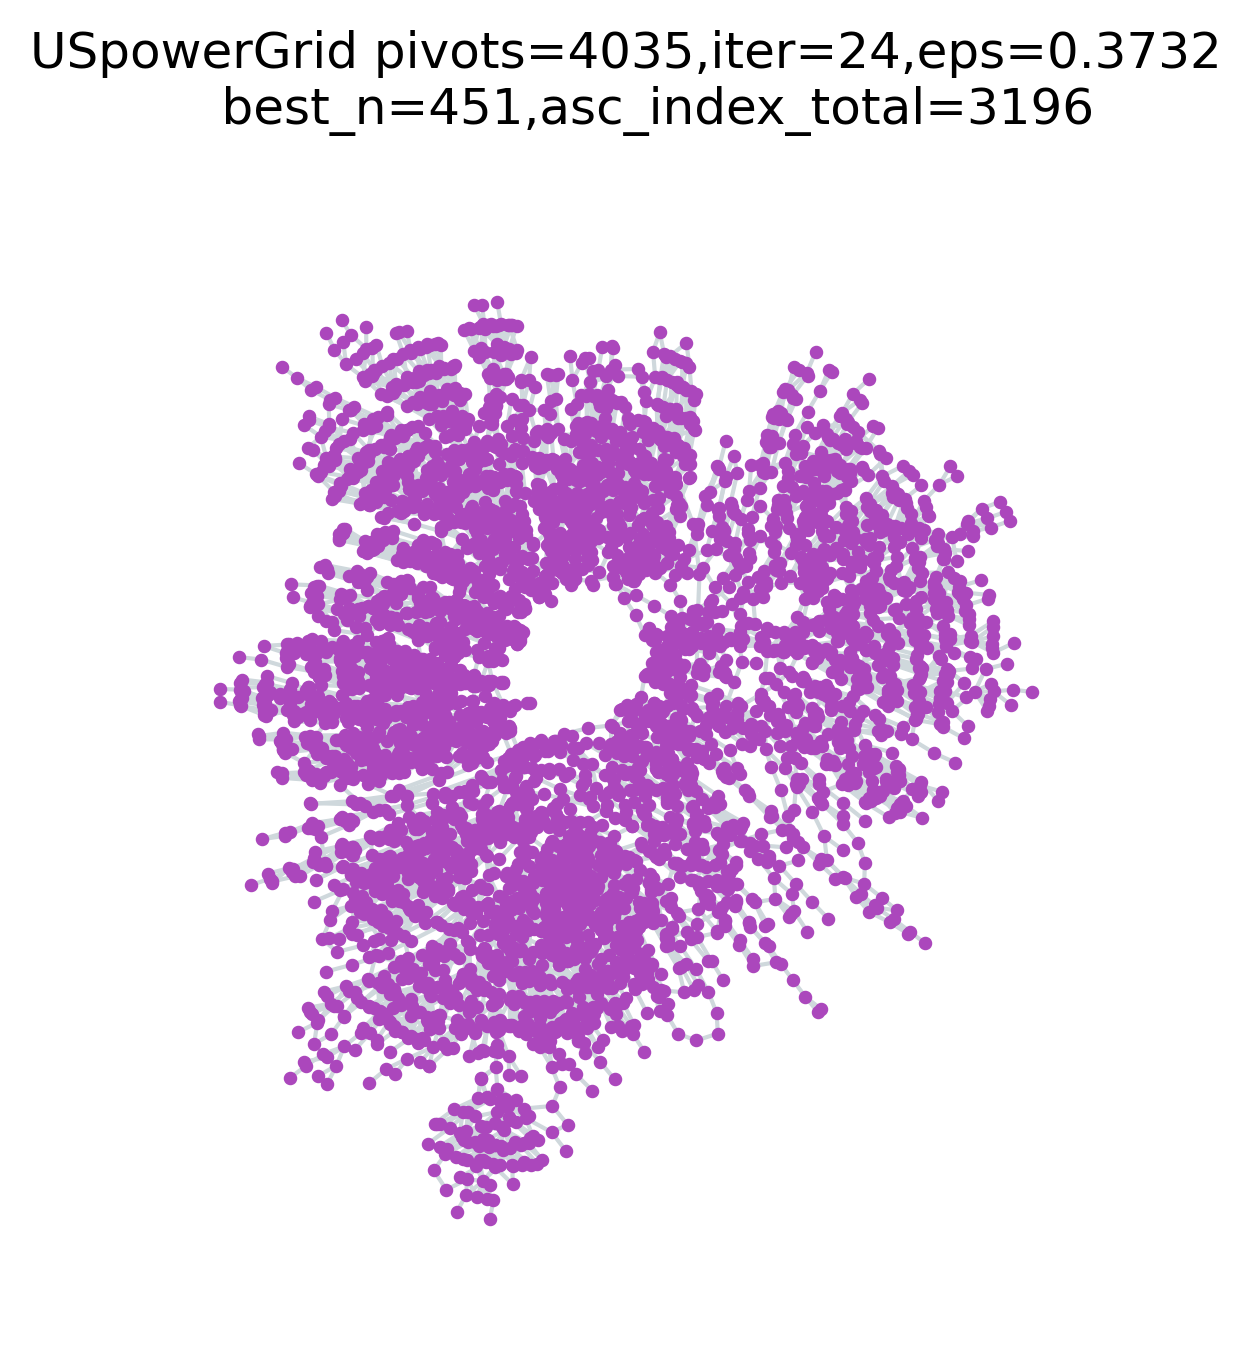

{'angular_resolution': -5807.0927734375, 'aspect_ratio': 0.8592507839202881, 'crossing_number': -20613.0, 'gabriel_graph_property': -3746261.5, 'ideal_edge_length': -1899.6529541015625, 'neighborhood_preservation': 0.053144339472055435, 'node_resolution': -8625225728.0, 'stress': -681364.0, 'time_complexity': -2497452000.28989, 'crossing_angle': -0.537425752255858, 'pivots_rate': 0.7652467182354822, 'iterations': 120, 'eps': 0.3257321188679881, 'angular_resolution_asc_order': 425, 'aspect_ratio_asc_order': 197, 'crossing_angle_asc_order': 290, 'crossing_number_asc_order': 430, 'gabriel_graph_property_asc_order': 441, 'ideal_edge_length_asc_order': 433, 'neighborhood_preservation_asc_order': 265, 'node_resolution_asc_order': 244, 'stress_asc_order': 421, 'time_complexity_asc_order': 49, 'order_sum': 3195, 'pref_order_sum': 3195}


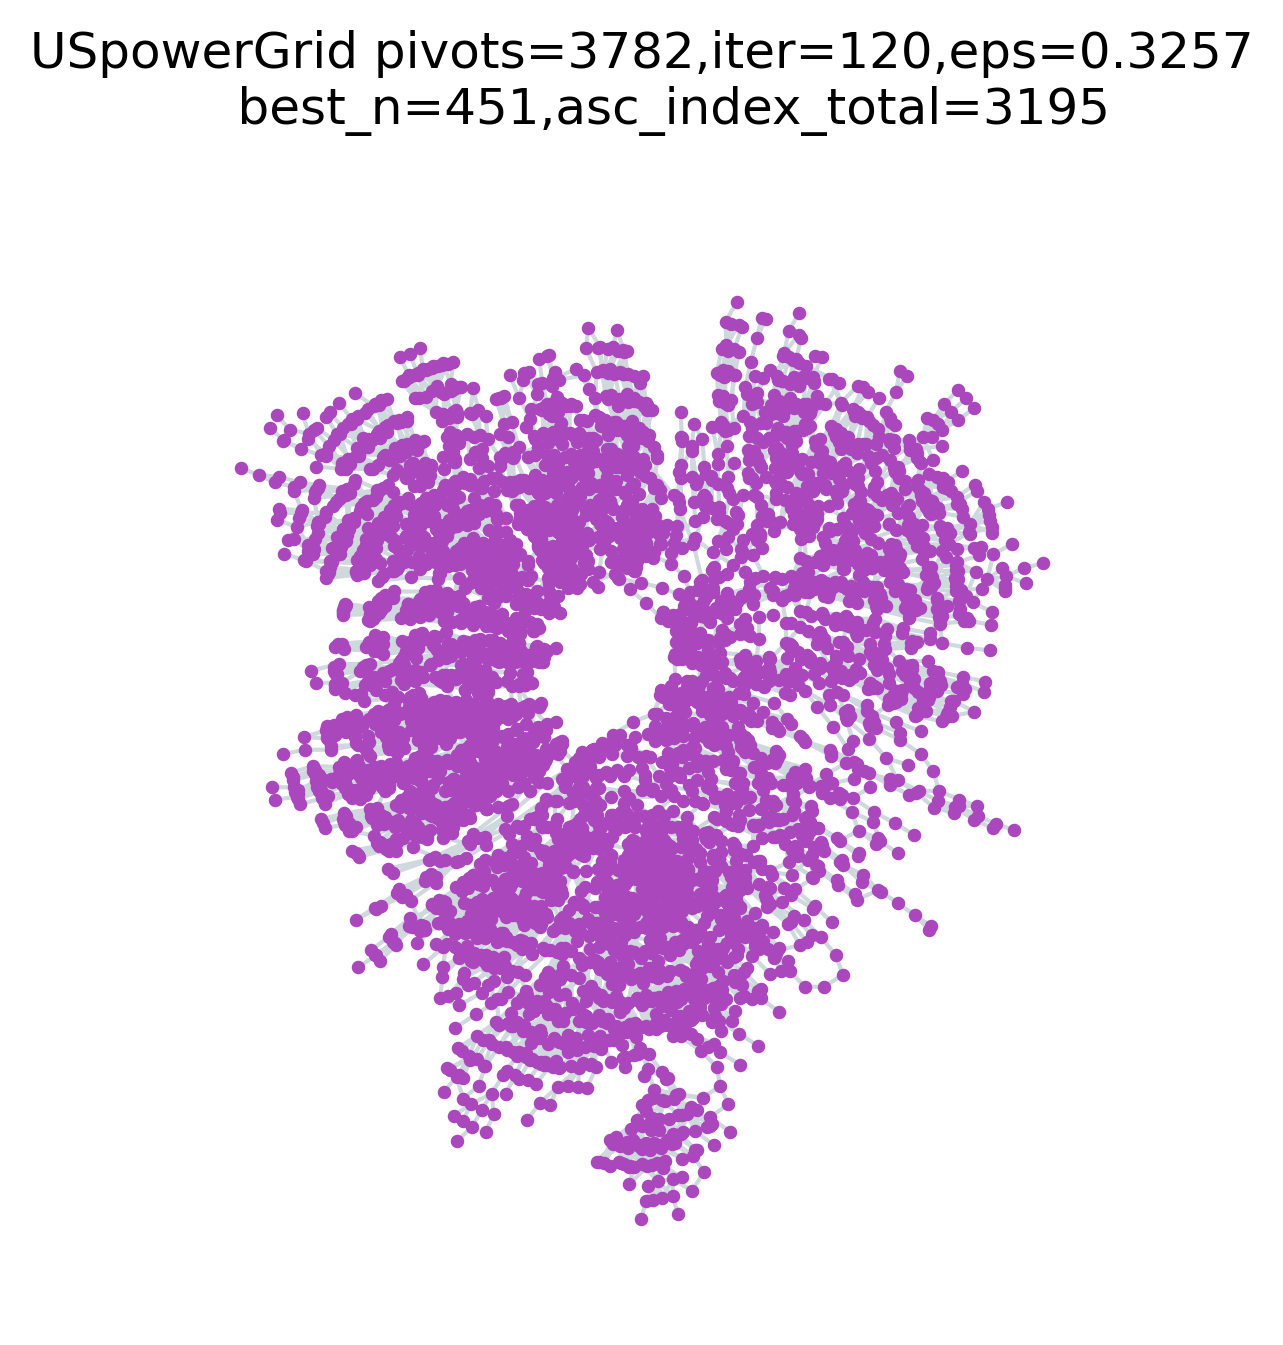

In [19]:
dataset_path = get_dataset_path(d_name)
nx_graph = nx_graph_preprocessing(
    load_nx_graph(dataset_path=dataset_path), EDGE_WEIGHT
)
n_nodes = len(nx_graph.nodes)

eg_graph, eg_indices = egraph_graph(nx_graph=nx_graph)
eg_distance_matrix = all_sources_bfs(eg_graph, EDGE_WEIGHT)

i = 0
for t in best_trials[:10]:
    pivots_rate = t["pivots_rate"]
    pivots = rate2pivots(rate=pivots_rate, n_nodes=n_nodes)
    iterations = t["iterations"]
    eps = t["eps"]

    eg_drawing = Drawing.initial_placement(eg_graph)

    pos = draw(
        pivots=pivots,
        iterations=iterations,
        eps=eps,
        eg_graph=eg_graph,
        eg_indices=eg_indices,
        eg_drawing=eg_drawing,
        edge_weight=EDGE_WEIGHT,
        seed=0,
    )
    fig, ax = plt.subplots(dpi=300, facecolor="white")
    ax.set_aspect("equal")

    ax.set_title(
        f"""{d_name} pivots={pivots},iter={iterations},eps={round(eps, 4)}
    best_n={len(best_trials)},asc_index_total={t['order_sum']}
"""
    )
    #     {'''
    # '''.join([f'{qm_name}={t[f"{qm_name}_asc_order"]}' for qm_name in qm_names])}
    print(t)

    nx.draw(
        nx_graph,
        pos=pos,
        node_size=5,
        node_color="#AB47BC",
        edge_color="#CFD8DC",
        ax=ax,
    )

    plt.show()